In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
# 2.Load Dataset
data = pd.read_csv("viettri_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,44,17,29,2,9,4
1,3/2/2019,65,37,27,4,12,4
2,3/3/2019,81,38,2,1,1,2
3,3/4/2019,51,24,21,4,8,1
4,3/5/2019,43,7,23,1,12,4
...,...,...,...,...,...,...,...
1915,5/28/2024,38,24,35,1,15,5
1916,5/29/2024,38,17,41,7,15,10
1917,5/30/2024,28,8,11,1,15,1
1918,5/31/2024,12,12,16,1,16,7


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,42.395313,22.470833,17.391667,7.528125,9.497917,3.961979
std,31.665288,16.124166,12.907283,4.971229,6.526731,2.516048
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,10.000000,8.750000,3.000000,4.000000,2.000000
50%,35.000000,20.000000,15.000000,7.000000,9.000000,4.000000
75%,59.000000,32.000000,24.000000,11.000000,14.000000,6.000000
max,178.000000,94.000000,114.000000,35.000000,27.000000,22.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25','pm10']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25,pm10
0,44,17
1,65,37
2,81,38
3,51,24
4,43,7
...,...,...
1915,38,24
1916,38,17
1917,28,8
1918,12,12


In [5]:
def smoothed(data):
    # Apply moving average filter to smooth the forecasted values
    window_size = 5  # You can adjust the window size as needed
    forecast_smoothed = data.rolling(window=window_size).mean()

    # Interpolate NaN values resulting from the moving average
    forecast_smoothed_interpolated = forecast_smoothed.interpolate()

    # Fill remaining NaN values
    forecast_smoothed_filled = forecast_smoothed_interpolated.fillna(method='bfill')  # or 'ffill', or use fillna(value=0)
    
    return forecast_smoothed_filled

# Example usage
data = smoothed(data)

<Axes: >

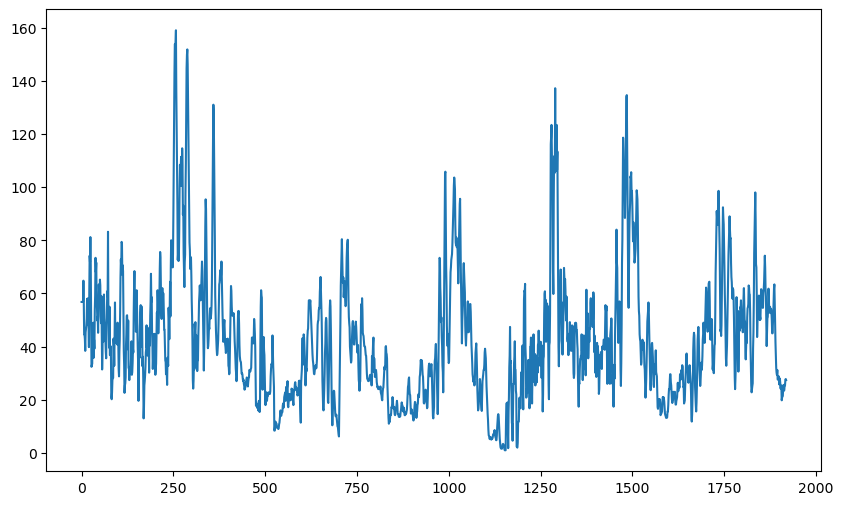

In [6]:
data['pm25'].plot(figsize=(10,6))

In [7]:
# Split the data into training, testing
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1536
Test data size: 384


In [8]:
# 3. Quá trình Training
model = VAR(train_data)
model_fitted = model.fit(maxlags =15 , ic='aic')

In [9]:
# 4. Quá trình testing 
# Dự đoán cho cả 'pm25' và 'pm10'
y_pred = model_fitted.forecast(train_data.values[-model_fitted.k_ar:], steps=len(test_data))


In [10]:
y_pred

array([[21.68851815, 14.19570899],
       [21.51917483, 15.23552023],
       [24.02467018, 16.71295481],
       [25.9863912 , 17.7598617 ],
       [29.79221664, 19.19695253],
       [32.35289061, 19.63743712],
       [33.91932541, 19.55789834],
       [34.71023288, 18.85741176],
       [34.82769972, 19.03983026],
       [34.41692456, 19.14934474],
       [34.80983309, 19.00349099],
       [34.67111348, 18.64955709],
       [34.24168682, 18.63138194],
       [34.18183606, 18.42460153],
       [33.99168749, 17.98973015],
       [33.68064207, 17.93479079],
       [33.7881098 , 18.09375344],
       [34.24494875, 18.16145657],
       [34.57977755, 17.98978853],
       [35.22771567, 18.05710663],
       [35.50524572, 17.98256576],
       [35.70817101, 17.93430768],
       [35.74522639, 17.87655514],
       [35.84639918, 18.05491492],
       [35.7136246 , 18.15893938],
       [35.89425199, 18.28787745],
       [36.07056978, 18.32028062],
       [36.24385963, 18.41366846],
       [36.36477663,

In [11]:
y_pred = pd.DataFrame(y_pred, columns=['pm25', 'pm10'])
y_pred = smoothed(y_pred)
y_pred = y_pred.to_numpy()

In [12]:
y_pred

array([[24.6021942 , 16.62019965],
       [24.6021942 , 16.62019965],
       [24.6021942 , 16.62019965],
       [24.6021942 , 16.62019965],
       [24.6021942 , 16.62019965],
       [26.73506869, 17.70854528],
       [29.21509881, 18.5730209 ],
       [31.35221135, 19.00191229],
       [33.12047305, 19.257906  ],
       [34.04541464, 19.24838444],
       [34.53680313, 19.12159522],
       [34.68716075, 18.93992697],
       [34.59345153, 18.894721  ],
       [34.4642788 , 18.77167526],
       [34.37923139, 18.53975234],
       [34.15339318, 18.3260123 ],
       [33.97679245, 18.21485157],
       [33.97744483, 18.1208665 ],
       [34.05703313, 18.0339039 ],
       [34.30423876, 18.04737919],
       [34.6691595 , 18.05693419],
       [35.05317174, 18.02504503],
       [35.35322727, 17.96806475],
       [35.6065516 , 17.98109003],
       [35.70373338, 18.00145657],
       [35.78153464, 18.06251891],
       [35.85401439, 18.1397135 ],
       [35.95374104, 18.24713616],
       [36.05741652,

In [13]:

# 5. Quá trình tạo index predict 90 ngày tiếp theo
last_index = data.index[-1]

# # Dự đoán cho 90 ngày tiếp theo
y_next_90_days = model_fitted.forecast(data.values[-model_fitted.k_ar:], steps=90)



# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)



Predicted closing prices for the next 90 days:
[[28.61372937 17.69519354]
 [29.57043186 17.05461667]
 [28.82618861 17.7346199 ]
 [30.35678553 18.31098586]
 [32.31595386 17.27033855]
 [31.70039297 17.12341317]
 [31.84631519 17.0899197 ]
 [32.60676253 16.60979302]
 [31.91056355 16.27796475]
 [31.44899006 16.58599539]
 [32.15201334 16.62160909]
 [32.1190061  16.72250481]
 [32.28858523 16.79948829]
 [32.98639307 16.762895  ]
 [33.00056242 16.83896825]
 [33.02510696 16.90592555]
 [33.54240224 16.88553046]
 [33.53479318 16.93863894]
 [33.62022148 17.12873223]
 [34.12922874 17.09387606]
 [34.32657393 17.10608928]
 [34.32431027 17.21251188]
 [34.68068985 17.3232917 ]
 [34.75794681 17.33289909]
 [34.80182562 17.4635793 ]
 [35.03014978 17.57960839]
 [35.22692227 17.63485661]
 [35.33669368 17.67867555]
 [35.60571151 17.75925512]
 [35.75612101 17.80708161]
 [35.8342369  17.86165571]
 [36.01207124 17.93541307]
 [36.12985334 17.9935648 ]
 [36.21777948 18.06825079]
 [36.37036683 18.13600446]
 [36.545

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính RMSE
rmse = np.sqrt(mean_squared_error(test_data['pm25'], y_pred[:, 0]))
print('Testing RMSE:', rmse)

# Tính MAE
mae = mean_absolute_error(test_data['pm25'], y_pred[:, 0])
print('\nTesting MAE:', mae)

# Tính MAPE
mape = np.mean(np.abs((test_data['pm25'] - y_pred[:, 0]) / test_data['pm25'])) * 100
print('\nTesting MAPE:', mape)


Testing RMSE: 18.76345445665067

Testing MAE: 15.422678303361435

Testing MAPE: 45.871082936696425


In [15]:
test_data.index

RangeIndex(start=1536, stop=1920, step=1)

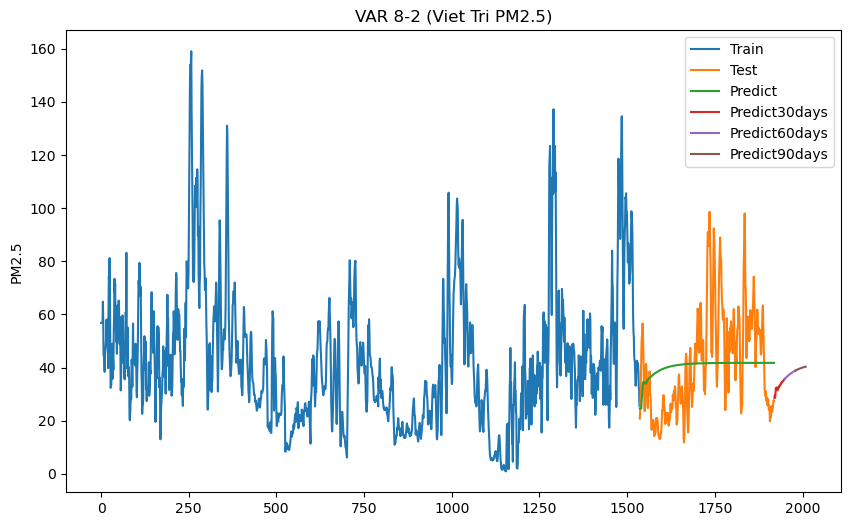

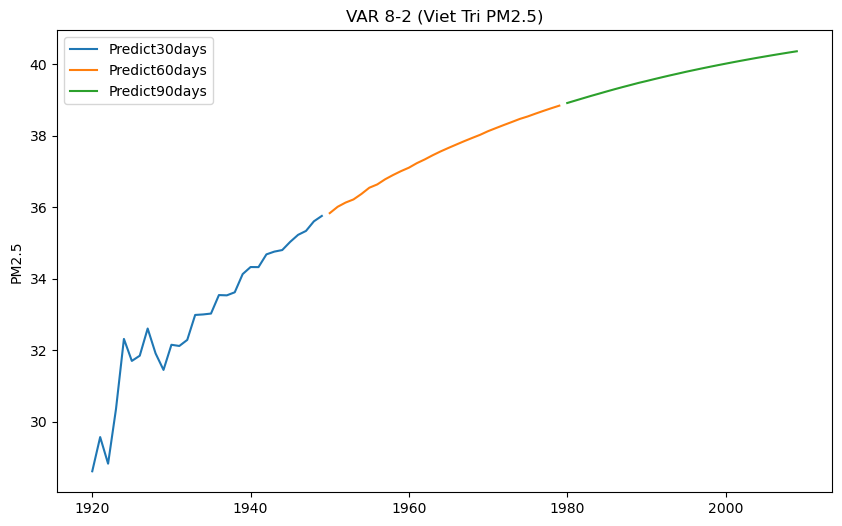

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử last_index và y_next_90_days đã được định nghĩa trước đó
# Bạn có thể thay thế chúng bằng dữ liệu thực tế của mình

# Vẽ biểu đồ huấn luyện và kiểm tra với dự đoán
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['pm25'], label='Train')
plt.plot(test_data.index, test_data['pm25'], label='Test')
plt.plot(test_data.index, y_pred[:, 0], label='Predict')

# Vẽ dự đoán 90 ngày
last_index = data.index[-1]  # Giả sử last_index là index cuối cùng của train_data

last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 8-2 (Viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()

# Vẽ dự đoán 90 ngày với kích thước 14x7
plt.figure(figsize=(10, 6))
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 8-2 (Viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()
